# **Ejercicios de pair programming Módulo 3 Sprint 1**
## **Regresión lineal: Lección 3**
### **Covarianza y correlación**

---

In [6]:
# Tratamiento de datos
# --------------------
import numpy as np
import pandas as pd

# Gráficos
# --------
import matplotlib.pyplot as plt
import seaborn as sns

# Establecer tamaño fijo de gráficas
# ----------------------------------
plt.rcParams["figure.figsize"] = (12,8)

En este ejercicio de pair programming seguiréis usando el dataset que seleccionasteis ayer.


In [2]:
df_socio = pd.read_csv("../datos/esperanza_vida.csv", index_col=0)
df_socio.tail()

,country,region,population_in_millions,population_density,urban_population_y,gdp_per_capita,health_total_expenditure,health_care_index,health_physicians,quantity_of_physicians,quality_of_life_index,purchasing_power_index,safety_index,pop_using_improved_drinking_water_urban,pop_using_improved_drinking_water_rural,pollution_index,life_expectancy_at_birth_total
61,United Arab Emirates,WesternAsia,9.400,112.4,86.248,40438.8,3.6,60.49,1.60,Muy pocos,139.27,116.77,79.34,98.0,95.2,58.52,77.647000
62,United Kingdom,NorthernEurope,66.182,273.6,83.143,44162.4,9.1,74.28,2.80,Pocos,172.87,96.85,58.81,99.1,99.6,34.88,81.256098
63,United States of America,NorthernAmerica,324.460,35.5,82.058,56053.8,17.1,68.22,2.60,Pocos,179.73,123.17,51.24,100.0,100.0,31.19,78.539024
64,Venezuela (Bolivarian Republic of),SouthAmerica,31.977,36.3,88.183,11068.9,5.3,36.90,2.66,Pocos,0.00,3.35,14.72,97.5,69.9,72.90,72.246000
65,Vietnam,South-easternAsia,95.541,308.1,35.213,2067.9,7.1,47.87,1.20,Muy pocos,36.12,24.77,47.04,94.4,69.7,88.10,75.241000



1. Pregunta teórica: ¿Qué diferencia existe entre la covarianza y la correlación?


>La correlación mide el efecto que tiene una variable sobre otra. Tiene dos atributos:
>-  La dirección de esta relación: si las variables tienen una relación positiva es que están directamente relacionadas y si las variables tienen una relación negativa, significa que están inversamente relacionadas.
>-  La cuantificación de esta relación: se mide del 0 al 1 para las relaciones positivas, del 0 al -1 para las relaciones negativas; siendo el 0 la ausencia total de relación y el 1 o -1 una identificación completa.
>
>La covarianza, en cambio sólo nos informa del primero de estos atributos (si es positiva o negativa), pero no nos permite saber en qué grado se relacionan estas variables.

2. Calculad la covarianza y la correlación de nuestro dataset. No nos vale solo con que la calculéis, debéis hacer una interpretación de los resultados obtenidos. Calculad solo la correlación de Pearson.


In [13]:
df_socio.corr()

/tmp/ipykernel_9344/603964300.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_socio.corr()


,population_in_millions,population_density,urban_population_y,gdp_per_capita,health_total_expenditure,health_care_index,health_physicians,quality_of_life_index,purchasing_power_index,safety_index,pop_using_improved_drinking_water_urban,pop_using_improved_drinking_water_rural,pollution_index,life_expectancy_at_birth_total
population_in_millions,1.000000,-0.038811,-0.290713,-0.200381,-0.158467,-0.027811,-0.365764,-0.230366,-0.032813,-0.097319,-0.511437,-0.569503,0.311509,-0.288063
population_density,-0.038811,1.000000,0.265992,0.210063,-0.030151,0.091250,-0.061438,-0.193296,0.099270,0.279916,0.085144,0.098794,0.022630,0.247280
urban_population_y,-0.290713,0.265992,1.000000,0.528946,0.312940,0.224728,0.364699,0.291156,0.466491,0.108469,0.415449,0.391694,-0.264545,0.501342
gdp_per_capita,-0.200381,0.210063,0.528946,1.000000,0.496722,0.428242,0.383842,0.562653,0.773463,0.412371,0.455996,0.513217,-0.644420,0.719818
health_total_expenditure,-0.158467,-0.030151,0.312940,0.496722,1.000000,0.276181,0.490780,0.628211,0.450815,0.107921,0.410066,0.409878,-0.613465,0.527627
health_care_index,-0.027811,0.091250,0.224728,0.428242,0.276181,1.000000,0.213655,0.475536,0.494915,0.397399,0.171574,0.367700,-0.435810,0.503601
health_physicians,-0.365764,-0.061438,0.364699,0.383842,0.490780,0.213655,1.000000,0.551521,0.228447,0.298626,0.518884,0.539347,-0.597575,0.551743
quality_of_life_index,-0.230366,-0.193296,0.291156,0.562653,0.628211,0.475536,0.551521,1.000000,0.708566,0.502290,0.459569,0.546003,-0.757877,0.587173
purchasing_power_index,-0.032813,0.099270,0.466491,0.773463,0.450815,0.494915,0.228447,0.708566,1.000000,0.462898,0.336086,0.443136,-0.560384,0.568657
safety_index,-0.097319,0.279916,0.108469,0.412371,0.107921,0.397399,0.298626,0.502290,0.462898,1.000000,0.402210,0.468329,-0.396554,0.535610


In [14]:
df_socio.cov()

/tmp/ipykernel_9344/3352727770.py:1: FutureWarning: The default value of numeric_only in DataFrame.cov is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_socio.cov()


,population_in_millions,population_density,urban_population_y,gdp_per_capita,health_total_expenditure,health_care_index,health_physicians,quality_of_life_index,purchasing_power_index,safety_index,pop_using_improved_drinking_water_urban,pop_using_improved_drinking_water_rural,pollution_index,life_expectancy_at_birth_total
population_in_millions,56726.667820,-1.198640e+04,-1228.867417,-9.823013e+05,-102.579462,-66.874544,-99.085803,-2310.289258,-234.202275,-328.224254,-995.997757,-2198.989440,1600.658832,-302.126770
population_density,-11986.400395,1.681445e+06,6121.488802,5.606410e+06,-106.259557,1194.591560,-90.614269,-10554.041690,3857.551673,5139.817049,902.747062,2076.850498,633.092381,1412.013819
urban_population_y,-1228.867417,6.121489e+03,314.988368,1.932204e+05,15.095148,40.266927,7.362048,217.584248,248.109360,27.260222,60.289016,112.700907,-101.293302,39.182240
gdp_per_capita,-982301.308201,5.606410e+06,193220.350494,4.236320e+08,27786.677647,88987.253146,8985.944948,487628.701901,477075.516695,120187.817116,76741.228991,171249.272140,-286152.339283,65241.701584
health_total_expenditure,-102.579462,-1.062596e+02,15.095148,2.778668e+04,7.386837,7.578209,1.517164,71.893357,36.718112,4.153474,9.112891,18.059981,-35.971063,6.314871
health_care_index,-66.874544,1.194592e+03,40.266927,8.898725e+04,7.578209,101.926789,2.453434,202.153825,149.736451,56.813126,14.163412,60.182695,-94.923769,22.389215
health_physicians,-99.085803,-9.061427e+01,7.362048,8.985945e+03,1.517164,2.453434,1.293697,26.413928,7.786714,4.809740,4.825690,9.945302,-14.663667,2.763512
quality_of_life_index,-2310.289258,-1.055404e+04,217.584248,4.876287e+05,71.893357,202.153825,26.413928,1772.998721,894.103497,299.492861,158.225872,372.720089,-688.472557,108.875068
purchasing_power_index,-234.202275,3.857552e+03,248.109360,4.770755e+05,36.718112,149.736451,7.786714,894.103497,898.061585,196.433878,82.352392,215.289640,-362.303913,75.043272
safety_index,-328.224254,5.139817e+03,27.260222,1.201878e+05,4.153474,56.813126,4.809740,299.492861,196.433878,200.519340,46.569810,107.513443,-121.147483,33.399121


>Lo que se puede observar a nivel general es que la mayoría de las relaciones que hay entre nuestras variables, son relaciones positivas.
>Por otro lado, como excepción, podemos comprobar como el nivel de polución tiene una correlación negativa respecto a la mayoría de variables predictoras.
>
>La correlación más fuerte (de manera positiva) que tenemos es que los dos tipos de población(rural y urbana) y su consumo de agua potable. Esta correlación tiene sentido dado que son dos vertientes de la misma métrica. También observamos una fuerte correlación entre el PIB per cápita y el índice de nivel adquisitivo de la población.
>
>La correlación más fuerte (en sentido negativo) que queremos resaltar es la que se da entre el nivel de calidad de vida y la polución.
>
>Por último, nos resulta llamativo que las dos variables que menos se relacionan entre si son el índice de polución y la densidad de población, con una correlación muy cercana al 0.

3. Con los resultados de la correlación del ejercicio anterior, cread un heatmap.


/tmp/ipykernel_903/3236115261.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_socio.corr(), cmap='Spectral_r', annot=True)


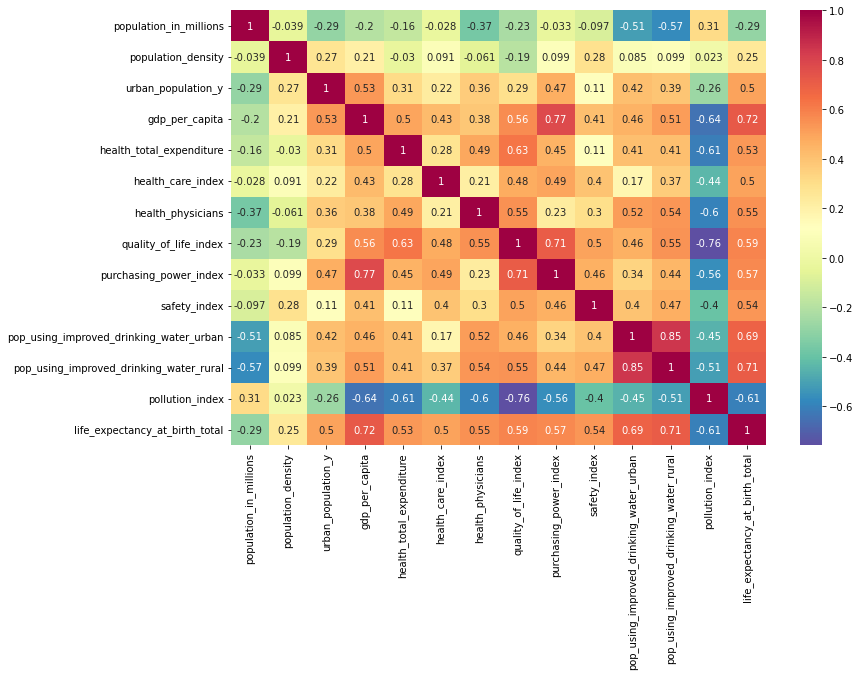

In [7]:
plt.figure()

sns.heatmap(df_socio.corr(), cmap='Spectral_r', annot=True)

plt.savefig("../datos/heatmap.png")


4. Guardad la gráfica del heatmap.

>El código de guardado se ha ejecutado en la celda anterior.